In [5]:
import collections



defaultdict(<class 'list'>, {1: [2], 2: [1, 3]})
{1: [2, 2, 2], 2: [1, 3, 1, 3, 1, 3]}


In [8]:
def canFinish(numCourses, prerequisites):
    Border = {}
    for k,v in prerequisites:
        Border.setdefault(k,[]).append(v)

    Visits = [0]*numCourses

    def dfs(cour):
        if cour not in Border.keys():
            Visits[cour] = 1
            return True
        elif Visits[cour] == 1:
            return True
        elif Visits[cour] == 2:
            return False
        else:
            Visits[cour] = 2
            for elem in Border[cour]:
                ans = dfs(elem)
                if ans == False:
                    return False
            Visits[cour] = 1

    for cour in range(numCourses):
        #未搜索，则进行搜索
        if Visits[cour]==0:
            ans = dfs(cour)
            if ans == False:
                return False
    return True


numCourse = 2
prerequisites = [[1,0],[0,1]]
ans = canFinish(numCourse,prerequisites)
print(ans)

False


torch.Size([1, 1024, 28, 28])


In [3]:
##将txt文件中每个词条后缀添加文字
added = '.jpg'
read_file_path = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/trainval.txt'
write_file_path = '/home/qxy/Desktop/datasets/VOC2012/data_annotation/trainval_R.txt'
Sample_lis = []
with open(read_file_path,'r') as f:
    f = f.readlines()
    for sample in f:
        sample = sample.split('\n')[0]+added+'\n'
        Sample_lis.append(sample)

with open(write_file_path,'w') as f:
    for sample in Sample_lis:
        f.write(sample)

### 组合出Top-1/Top-5结果

In [116]:
%load_ext autoreload
%autoreload 2
import json
# cls_weight = '/home/qxy/Desktop/BigGan/weight_result/cls_result/resnet_CUB_cls_5794/data/classfication1.txt'
# loc_weight = '/home/qxy/Desktop/BigGan/weight_result/IoU_data/CUB_SAL.json'

# cls_weight = '/home/qxy/Desktop/BigGan/weight_result/cls_result/002402_ILSVRC_50000/classification5.json'
# loc_weight = '/home/qxy/Desktop/BigGan/weight_result/IoU_data/ILSVRC_SAL.json'

cls_weight = '/home/qxy/Desktop/BigGan/weight_result/cls_result/resnet_CUB_cls_5794/data/classfication1.txt'
loc_weight = '/home/qxy/Desktop/beta/results/IoU_data/001726_CUB_5794.json'

with open(cls_weight,'r') as f:
    cls_result = json.load(f)

with open(loc_weight,'r') as f:
    loc_result = json.load(f)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
Cal_top = cal_topk(cls_result,loc_result)
result = Cal_top.cal_result()
cls_acc = Cal_top.cal_cls_acc()
loc_acc = Cal_top.cal_loc_acc()
print(result)
print(cls_acc)
print(loc_acc)

100%|██████████| 5794/5794 [00:00<00:00, 87175.39it/s]

[0.65861236 0.6869175  0.69968933 0.70762858 0.71263376 0.71763894
 0.72195375 0.72506041 0.72782188 0.72920262 0.73127373 0.73213669
 0.73351743 0.73369002 0.73541595 0.73576113 0.73696928 0.73714187
 0.7386952  0.73921298 0.74007594 0.74042113 0.74042113 0.74162927
 0.74249223 0.7431826  0.74456334 0.7454263  0.74577149 0.74628926
 0.74680704 0.74680704 0.74732482 0.74767    0.74749741 0.74767
 0.7478426  0.74801519 0.74870556 0.74818778 0.74870556 0.74818778
 0.74887815 0.74853297 0.7500863  0.74870556 0.74490853 0.74266483]
0.8098032447359337
[0.80341733 0.83879876 0.85346911 0.86503279 0.87055575 0.87659648
 0.88194684 0.88574387 0.8895409  0.89230238 0.89454608 0.89575423
 0.89799793 0.89834311 0.90024163 0.90127718 0.90179496 0.90179496
 0.90352088 0.90455644 0.90576458 0.90628236 0.90714532 0.90835347
 0.90938902 0.91025198 0.91163272 0.91301346 0.91387642 0.91456679
 0.91508457 0.91577494 0.9166379  0.91681049 0.91681049 0.91715568
 0.91732827 0.91784605 0.91905419 0.91870901 

In [108]:
import numpy as np
from tqdm import tqdm
class cal_topk(object):
    def __init__(self,cls_result,loc_result):
        self.cls_result = cls_result
        self.loc_result = loc_result
        self.len = len(loc_result)
        self.threshold_len = len(loc_result[0])

    def cal_cls_acc(self):
        result = 0
        for i in tqdm(range(self.len)):
            if self.cls_result[i]==100:
                result += 1
        result /= self.len
        return result


    def cal_loc_acc(self):
        result=np.array([0 for x in range(self.threshold_len)])
        for i in tqdm(range(self.len)):
            loc_acc = self.loc_result[i]
            for j in range(self.threshold_len):
                if loc_acc[j]>=0.5:
                    result[j]=result[j]+1
        result = result/self.len
        return result

    def cal_result(self):
        result=np.array([0 for x in range(self.threshold_len)])
        for i in tqdm(range(self.len)):
            added = self._cal_single(i)
            result = result + added
        result = result/self.len
        return result

    def _cal_single(self,idx):
        single=np.array([0 for x in range(self.threshold_len)])
        cls_acc = self.cls_result[idx]
        loc_acc = self.loc_result[idx]
        if cls_acc == 0:
            return single
        else:
            for i in range(self.threshold_len):
                if loc_acc[i]>0.5:
                    single[i]=1
            return single

Cal_top = cal_topk(cls_result,loc_result)
result = Cal_top.cal_result()
cls_acc = Cal_top.cal_cls_acc()
loc_acc = Cal_top.cal_loc_acc()
print(result)
print(cls_acc)
print(loc_acc)

100%|██████████| 5794/5794 [00:00<00:00, 136324.00it/s]

[0.62771833 0.64204349 0.65429755 0.66499827 0.67777011 0.68898861
 0.698136   0.7093545  0.71539524 0.72229893 0.72868485 0.73179151
 0.73731446 0.74059372 0.74439075 0.74680704 0.74663445 0.74594408
 0.74577149 0.74473593 0.7431826  0.73973076 0.73593372 0.73369002
 0.72833966 0.72385226 0.71608561 0.70918191 0.70003452 0.69002416
 0.67449085]
0.8098032447359337
[0.76320331 0.7814981  0.79806697 0.81135658 0.82706248 0.84173283
 0.85346911 0.86796686 0.87573352 0.88384536 0.89143942 0.89627201
 0.90300311 0.90662755 0.91266828 0.91612012 0.91629272 0.91612012
 0.91577494 0.91491198 0.91370383 0.90973421 0.90610977 0.90334829
 0.89609941 0.89040387 0.88142906 0.87279945 0.86278909 0.85070763
 0.83172247]


In [104]:
import numpy as np
k = 5
a = np.array([0 for x in range(k)])
b = np.array([1 for x in range(k)])
c = (a+b+b)/4
print(c)

[0.5 0.5 0.5 0.5 0.5]


### 绘制小提琴图

In [92]:
%load_ext autoreload
%autoreload 2
import pandas as pd
read_paths = '/home/qxy/Desktop/beta/results/Figure/001709_363_violin.xlsx'
df1 = pd.read_excel(read_paths)
print(df1.keys())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Index(['PRN', 'PsyNet'], dtype='object')


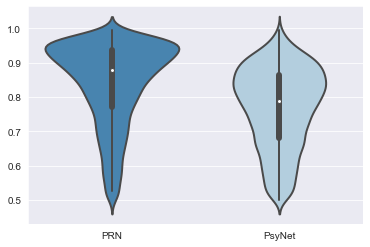

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(data=df1,palette='Blues_r',order=['PRN','PsyNet'],linewidth=2)
# sns.violinplot(data=df1,palette='Blues_r')
plt.savefig('/home/qxy/Desktop/beta/results/Figure/363_vio.pdf',bbox_inches='tight')
plt.show()

In [70]:
plt.savefig('/home/qxy/Desktop/beta/results/Figure/360_vio.pdf',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

绘制折线统计图

In [204]:
import numpy as np
import json
import pandas
from pandas.core.frame import DataFrame
wo_paths = '/home/qxy/Desktop/beta/results/data/psy_wo_pretrain.json'
w_paths = '/home/qxy/Desktop/beta/results/data/psy_w_pretrain.json'
epoch = [x for x in range(1,101)]
ID = [1 for x in range(1,101)]
with open(wo_paths,'r') as f:
    psy_wo = json.load(f)
    psy_wo_loc = psy_wo['0.5']
    psy_wo_rot = psy_wo['acc_RoT']
    psy_wo_pd = {'loc':psy_wo_loc, 'rot':psy_wo_rot,'epoch':epoch,'ID':ID}
    psy_wo_pd = DataFrame(psy_wo_pd)

with open(w_paths,'r') as f:
    psy_w = json.load(f)
    psy_w_loc = psy_w['0.5']
    psy_w_rot = psy_w['acc_RoT']
    psy_w_pd = {'loc':psy_w_loc, 'rot':psy_w_rot,'epoch':epoch,'ID':ID}
    psy_w_pd = DataFrame(psy_w_pd)



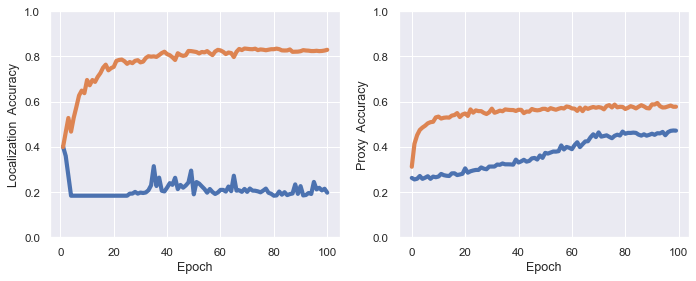

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.notebook_repr_html=False  # 表格显示
plt.rcParams['figure.dpi'] = 75  # 图形分辨率
sns.set_theme(style='darkgrid')  # 图形主题
sns.set(font_scale=1)
fig = plt.figure(figsize=(11,4))
plt.subplot(121)

sns.lineplot(y = 'loc', x = 'epoch',data=psy_wo_pd,linewidth=4)
ax = sns.lineplot(y = 'loc',x = 'epoch', data=psy_w_pd,linewidth=4)
ax.set(ylim=(0.0,1.0))
plt.ylabel('Localization  Accuracy')
plt.xlabel('Epoch')

plt.subplot(122)
sns.lineplot(data=psy_wo_pd['rot'],linewidth=4)
ax = sns.lineplot(data=psy_w_pd['rot'],linewidth=4)
ax.set(ylim=(0.0,1.0))
plt.ylabel('Proxy  Accuracy')
plt.xlabel('Epoch')


plt.savefig('/home/qxy/Desktop/beta/results/Figure/Psy_Net.pdf',bbox_inches='tight')
plt.show()

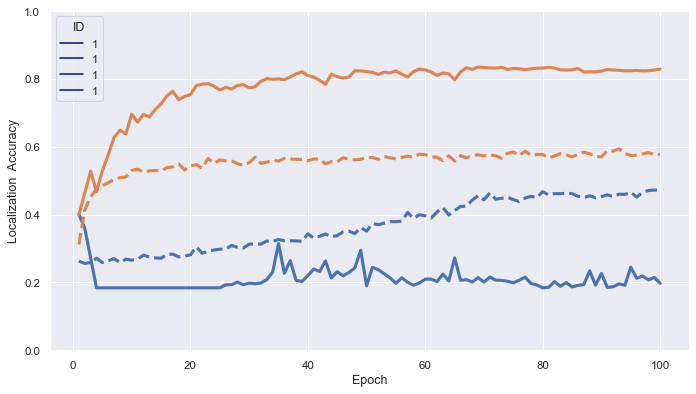

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.notebook_repr_html=False  # 表格显示
plt.rcParams['figure.dpi'] = 75  # 图形分辨率
sns.set_theme(style='darkgrid')  # 图形主题
sns.set(font_scale=1)
fig = plt.figure(figsize=(11,6))
current_palette = sns.color_palette()
ax = sns.lineplot(y = 'loc', x = 'epoch',data=psy_wo_pd,hue='ID',linewidth=3,palette='dark')
sns.lineplot(y = 'loc', x = 'epoch',data=psy_w_pd,hue='ID',linewidth=3,palette='dark')
sns.lineplot(y = 'rot', x = 'epoch',data=psy_wo_pd,hue='ID',linewidth=3,linestyle='--',palette='dark')
ax = sns.lineplot(y = 'rot', x = 'epoch',data=psy_w_pd,hue='ID',linewidth=3,linestyle='--',palette='dark')

#设置线条颜色
lines = ax.get_lines()
lines[0].set_color(sns.color_palette()[0]) 
lines[1].set_color(sns.color_palette()[0]) 
lines[2].set_color(sns.color_palette()[1]) 
lines[3].set_color(sns.color_palette()[1]) 
lines[4].set_color(sns.color_palette()[0]) 
lines[5].set_color(sns.color_palette()[0]) 
lines[6].set_color(sns.color_palette()[1]) 
lines[7].set_color(sns.color_palette()[1]) 


ax.set(ylim=(0.0,1.0))
plt.ylabel('Localization  Accuracy')
plt.xlabel('Epoch')

# plt.subplot(122)
# sns.lineplot(data=psy_wo_pd['rot'],linewidth=4)
# ax = sns.lineplot(data=psy_w_pd['rot'],linewidth=4)
# ax.set(ylim=(0.0,1.0))
# plt.ylabel('Proxy  Accuracy')
# plt.xlabel('Epoch')


plt.savefig('/home/qxy/Desktop/beta/results/Figure/Psy_Net2.pdf',bbox_inches='tight')
plt.show()

In [213]:
print(sns.color_palette()[0])

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)


ValueError: The following variable cannot be assigned with wide-form data: `hue`

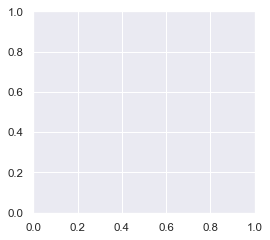

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

col1 = ["A"]*5 + ["B"]*5
col2 = list("abcde")*2
val = np.random.rand(10)
df = pd.DataFrame({"col1":col1, "col2":col2, "val":val})
df

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(wspace=0.1, hspace=0.25)
for i, palette in enumerate(["deep", "muted", "bright", "dark"]):
    ax = fig.add_subplot(2, 2, i+1)
    # sns.barplot(x="col2", y="val", hue="col1", data=df, ax=ax, palette=palette)
    # sns.lineplot(x="col2", y="val", data=df, ax=ax, palette=palette)
    sns.lineplot(y = 'loc', x = 'epoch',hue='ID' ,data=psy_wo_pd,linewidth=3,ax = ax, palette=palette)
    # sns.lineplot(data=psy_w_pd['loc'],linewidth=3,ax = ax,palette=palette)
    ax.set_title(palette)


### 批量压缩/解压缩

In [15]:
#1得到当前文件夹下文件名列表
#2对每个文件实施压缩指令
import os
import ipdb
root_dir = '/home/qxy/Desktop/try_file'
root, dirs,file_list = next(os.walk(root_dir))

#压缩文件
for file_name in file_list:
    file_path = file_name
    # file_path = os.path.join(root_dir,file_name)
    restore_path = file_path.split('.')[0]+'.tar'
    # restore_path = os.path.join(root_dir,restore_path)
    # print(restore_path)
    # print(file_path)
    # ipdb.set_trace()
    os.system('cd {} ;tar -cvf {} {}'.format(root_dir,restore_path, file_path))



a3.txt
a4.txt
a2.txt
a.txt
a5.txt


In [23]:
from tqdm import tqdm
root_dir = '/home/qxy/Desktop/try_file'
root, dirs,file_list = next(os.walk(root_dir))
#解压缩文件
for file_name in tqdm(file_list):
    file_path = file_name
    # file_path = os.path.join(root_dir,file_name)
    restore_path = file_path.split('.')[0]
    # restore_path = os.path.join(root_dir,restore_path)
    # print(restore_path)
    # print(file_path)
    # ipdb.set_trace()
    os.system('cd {} ; mkdir {}'.format(root_dir, restore_path))
    os.system('cd {} ;tar -xf {} -C {}'.format(root_dir, file_path,restore_path))
    os.system('cd {} ;rm -rf {} '.format(root_dir, file_path))

100%|██████████| 2/2 [00:00<00:00,  6.57it/s]


## HDf5 Datasets

task1: store 2 images into one file finished

task2: store CUB images into one file

task3: store ILSVRC validation into one file

task4: store ILSVRC train set into one file

In [1]:
%load_ext autoreload
%autoreload 2
from PIL import Image

In [4]:
#制作CUB的Hdf5版本
from utils.prepared_util import ori_filelist, hdf_maker

train_data_root = '/home/qxy/Desktop/datasets/CUB/data'
train_property = '/home/qxy/Desktop/datasets/CUB/data_annotation/train_list.json'
train_hdf_path = '/home/qxy/Desktop/datasets/CUB/train_data.hdf'



Ori_filelist = ori_filelist(train_data_root,train_property)
Hdf_maker = hdf_maker(train_hdf_path,Ori_filelist)
Hdf_maker.make(False)

100%|██████████| 5994/5994 [00:24<00:00, 249.51it/s]


In [8]:
train_data_root = '/home/qxy/Desktop/datasets/ILSVRC/data'
train_property = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/test_list.json'
train_hdf_path = '/mnt/usb/Dataset relate/ILSVRC_hdf5/data.hdf'
#原始数据存储位置
Ori_filelist = ori_filelist(train_data_root,train_property)
#hdf制作器
Hdf_maker = hdf_maker(train_hdf_path,Ori_filelist)
Hdf_maker.adding(Ori_filelist,False)
print(len(Hdf_maker))

100%|██████████| 50000/50000 [08:19<00:00, 100.08it/s]


1331167


In [92]:
Hdf_maker.fetch(idx=20).shape

(383, 500, 3)

In [27]:
#task1 store two images into one file:
img_pth_1 = '/home/qxy/Desktop/datasets/CUB/data/001.Black_footed_Albatross/Black_Footed_Albatross_0008_796083.jpg'
img_pth_2 = '/home/qxy/Desktop/datasets/CUB/data/001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg'

# what does the file look like in normal reading?
img1 = Image.open(img_pth_1)
print(type(img1))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [77]:
import h5py
import ipdb
from torchvision import transforms
try_path = '/home/qxy/Desktop/datasets/try1.h5'
img1 = Image.open(img_pth_1)
img2 = Image.open(img_pth_2)
print(type(img1))
# img1 = np.asarray(Image.open(img_pth_1))
# img2 = np.asarray(Image.open(img_pth_2))
# print(img1.shape)
# ipdb.set_trace()

with h5py.File(try_path,'w') as hdf:
    hdf.create_dataset('htt/img1',data=img1)
    hdf.create_dataset('htt/img2',data=img2)

with h5py.File(try_path,'r') as hdf:
    img1 =  np.array(hdf.get('htt/img2'))
    img1 = Image.fromarray(img1)
    print(type(img1))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.Image.Image'>


In [60]:
tsfm= transforms.Compose([transforms.Resize((156,156)), 
                                transforms.CenterCrop(128), #128
                                # transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                            transforms.Normalize((.5,.5,.5),(.5,.5,.5)),
                                ])
img1 =  tsfm(img1)
print(img1.mean())
print(img1.std())
print(img1.shape)

tensor(0.5706)
tensor(0.3480)
torch.Size([3, 128, 128])


In [61]:
img1 = Image.open(img_pth_2)
tsfm= transforms.Compose([transforms.Resize((156,156)), 
                                transforms.CenterCrop(128), #128
                                # transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                            transforms.Normalize((.5,.5,.5),(.5,.5,.5)),
                                ])
img1 =  tsfm(img1)
print(img1.mean())
print(img1.std())
print(img1.shape)

tensor(0.5706)
tensor(0.3480)
torch.Size([3, 128, 128])


In [19]:
f.close()
file = h5py.File(try_path,'w')
file.close()

f = h5py.File(try_path,'r+')
print(f.name)
print([k for k in f.keys()])
#建立组
grp = f.create_group('bar')
print(grp.name)
subgrp = grp.create_group('baz')
print(subgrp.name)

# grp2 = f.create_group('/some/long/path')
# print(grp2.name)
# grp3 = f['/some/long']
# print(grp3.name)

# del f['bar']
print(f.name)
print([k for k in f.keys()])

f.close()

/
[]
/bar
/bar/baz
/
['bar']


In [13]:
#数据集（dataset）的创建
import torch
import numpy as np
with h5py.File(try_path,'w') as f:
    f.create_dataset('default',(100,))
    f.create_dataset('ints',(100,),dtype='i8')
    f.create_dataset('init',data=torch.tensor([1,2,3]) )
    ls = list(f.keys())
    print(ls)
    data = f.get('init')
    data1 = torch.tensor(data)
    
print(data)
print(data1)


['default', 'init', 'ints']
<Closed HDF5 dataset>
tensor([1, 2, 3])


In [14]:
import numpy as np
import h5py

matrix1 = np.random.random(size=(1000,1000))
matrix2 = np.random.random(size=(1000,1000))
matrix3 = np.random.random(size=(1000,1000))
matrix4 = np.random.random(size=(1000,1000))

In [15]:
with h5py.File(try_path,'w') as hdf:
    G1 = hdf.create_group('Group1')
    G1.create_dataset('dataset1',data=matrix1)
    G1.create_dataset('dataset4',data=matrix4)

    G21 = hdf.create_group('Group2/SubGroup1')
    G21.create_dataset('dataset3', data = matrix3)
    
    G22 = hdf.create_group('Group2/SubGroup2')
    G22.create_dataset('dataset2', data = matrix2)
    

In [26]:
with h5py.File(try_path,'r') as hdf:
    base_items = list(hdf.items())
    print('Items in the base directory:', base_items)
    G2 = hdf.get('Group2')
    G2_items = list(G2.items())
    print('Items in Group2:', G2_items)
    G21 = G2.get('/Group2/SubGroup1')
    G21_items = list(G21.items())
    print('Items in Group21:', G21_items)
    dataset3 = np.array(G21.get('dataset3'))
    print(dataset3.shape)

Items in the base directory: [('Group1', <HDF5 group "/Group1" (2 members)>), ('Group2', <HDF5 group "/Group2" (2 members)>)]
Items in Group2: [('SubGroup1', <HDF5 group "/Group2/SubGroup1" (1 members)>), ('SubGroup2', <HDF5 group "/Group2/SubGroup2" (1 members)>)]
Items in Group21: [('dataset3', <HDF5 dataset "dataset3": shape (1000, 1000), type "<f8">)]
(1000, 1000)


## Data Reading

In [25]:
import ipdb
import json
read_path = '/home/qxy/Desktop/beta/results/data/psy_w_pretrain.txt'
save_path = '/home/qxy/Desktop/beta/results/data/psy_w_pretrain.json'
data_lis = [x*2 for x in range(2,102)]
save_dict = {}
with open(read_path,'r') as f:
    f = f.readlines()
    GT_list = []
    miou_list = []
    RoT_lis = []
    for idx in data_lis:
        data = f[idx]
        data = json.loads(data.replace("'","\""))
        GT_list.append(data['0.5'][0])
        miou_list.append(data['miou'][0])

        data = f[idx-1]
        RoT_lis.append( float(data.split('acc_RoT:')[-1]) )

    save_dict.update({'0.5': GT_list})
    save_dict.update({'miou': miou_list})
    save_dict.update({'acc_RoT': RoT_lis})

with open(save_path,'w') as f:
    json.dump(save_dict,f)


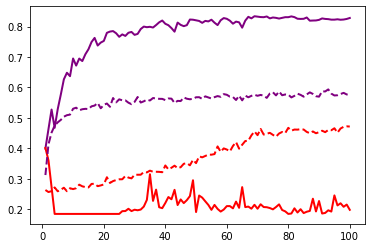

In [31]:
import numpy as np
import matplotlib.pyplot as plt

read_path_w = '/home/qxy/Desktop/beta/results/data/psy_w_pretrain.json'
read_path_wo = '/home/qxy/Desktop/beta/results/data/psy_wo_pretrain.json'
x = np.linspace(1, 100, 100)
with open(read_path_w,'r') as f:
    data_dict_w = json.load(f)
with open(read_path_wo,'r') as f:
    data_dict_wo = json.load(f)

GT_lis_w = np.array(data_dict_w['0.5'])
GT_lis_wo = np.array(data_dict_wo['0.5'])
acc_w = np.array(data_dict_w['acc_RoT'])
acc_wo = np.array(data_dict_wo['acc_RoT'])


plt.plot(x, GT_lis_w, ls='-', lw=2, label='cosine', color='purple')
plt.plot(x, GT_lis_wo, ls='-', lw=2, label='cosine', color='red')
plt.plot(x, acc_w, ls='--', lw=2, label='cosine', color='purple')
plt.plot(x, acc_wo, ls='--', lw=2, label='cosine', color='red')

In [19]:
import json
a = "{'GT-Loc': [[0.1842, 0.1842, 0.1842, 0.1899, 0.204, 0.2283, 0.2454, 0.2599, 0.2649, 0.2705, 0.2751, 0.282, 0.287, 0.2901, \
    0.2974, 0.2988, 0.3043, 0.3088, 0.3138, 0.3171, 0.3214, 0.3271, 0.3309, 0.3352, 0.3395, 0.344, 0.3467, 0.3517, 0.3564, 0.359,\
        0.3618, 0.3681, 0.37, 0.3719, 0.3738, 0.3775, 0.3819, 0.3852, 0.3894, 0.3909, 0.392, 0.3978, 0.3977, 0.4011, 0.3983]], \
             '0.3': [0.7249, 0.87], '0.4': [0.563, 0.89], '0.5': [0.4011, 0.87], '0.6': [0.2575, 0.89], '0.7': [0.1407, 0.89], \
        '0.8': [0.0514, 0.89], '0.9': [0.0055, 0.85], 'avg': [0.1712], 'miou': [0.4467, 0.87], 'box_v2': [0.4222]}"
b = json.loads(a.replace("'","\""))
GT = b['0.5'][0]
print(GT)

0.4011


In [13]:
jsonData = '{"a":1,"b":2,"c":3,"d":4,"e":5}'

text = json.loads(jsonData)
print(text)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<class 'PIL.Image.Image'>
torch.Size([1, 100, 100])
<class 'PIL.Image.Image'>


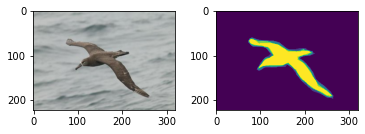

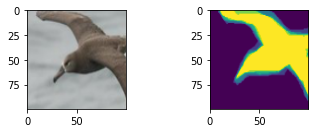

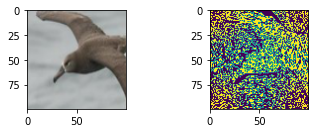

In [17]:
%load_ext autoreload
%autoreload 2

from PIL import Image
from torchvision import transforms as tfs
from torchvision import transforms
import matplotlib.pyplot as plt
import random
import numpy as np
import random
import torch
from data import TransMask,Random_noise
import ipdb
image_path = '/home/qxy/Desktop/datasets/CUB/data/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg'
mask_path = '/home/qxy/Desktop/datasets/CUB/segmentation/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.png'
image = Image.open(image_path)
mask = Image.open(mask_path)

PLT(image,mask)

tsfm=transforms.Compose([TransMask(['Resize',(256,256)]),#])
        TransMask(['RandomCrop',(100,100)])])

image_t, mask_t = tsfm([image,mask])
print(type(image_t))
PLT(image_t,mask_t)
image_t,mask_t = TransMask(['ToTensor',0])([image_t,mask_t])
print(mask_t.shape)
mask_t = (Random_noise(mask_t,0.4)>0.5).float()

image_t = transforms.ToPILImage()(image_t)
mask_t = transforms.ToPILImage()(mask_t)
print(type(image_t))
PLT(image_t,mask_t)

In [12]:
print(mask_t)

tensor([[[1., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 1., 1.,  ..., 0., 1., 0.]]])


In [2]:
def PLT(image,mask):
    plt.figure()
    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.subplot(2, 2, 2)
    plt.imshow(mask)
    plt.show

tensor([[-1., -1.,  1.],
        [-1., -1.,  1.],
        [ 1.,  1., -1.]])


In [25]:
a[0,:] = vertical_flip(a[0,:])
print(a)

tensor([[[7, 8, 9],
         [4, 5, 6],
         [1, 2, 3]]])


In [23]:
import torchvision.transforms as tf
horizontal_flip = tf.RandomHorizontalFlip(p=1)
vertical_flip = tf.RandomVerticalFlip(p=1)
rotate_90 = tf.RandomRotation(degrees=(90, 90), expand=False)
rotate_180 = tf.RandomRotation(degrees=(180, 180), expand=False)
rotate_270 = tf.RandomRotation(degrees=(270, 270), expand=False)

b0 = horizontal_flip(horizontal_flip(a))
b1 = vertical_flip(vertical_flip(a))
b2 = rotate_270(rotate_90(a))
b3 = rotate_180(rotate_180(a))
b4 = rotate_90(rotate_270(a))
print(b0)
print(b1)
print(b2)
print(b3)
print(b4)



tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


In [14]:
a = torch.randint(0,5,(5,))
print(a)

tensor([4, 4, 0, 4, 0])


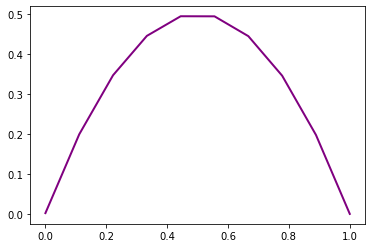

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.001, 1, 10)
y = 1-(x**2+(1-x)**2)
plt.plot(x, y, ls='-', lw=2, label='cosine', color='purple')


In [7]:
2*0.1*0.1

0.020000000000000004

## 对CrossEntropyLoss中weight的测试
结论:对类别有权重而不是对样本有权重

In [1]:
import torch
path1 = '/home/qxy/Desktop/beta/weight/pretrained_weight/000274_40000_3_result.pth'
path2 = '/home/qxy/Desktop/beta/weight/pretrained_weight/PsyNet/CUB_VGG16BN/Cub_VGG.ckpt'
info1 = torch.load(path1)
info2 = torch.load(path2)

In [82]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

inputs = torch.FloatTensor([0,1,0,0,0,1])
outputs = torch.LongTensor([0,1,1])
inputs = inputs.view((1,2,3))
outputs = outputs.view((1,3))
weight = torch.FloatTensor([1,2])
CEL = nn.CrossEntropyLoss(weight=weight)
loss = CEL(inputs,outputs)
print(inputs,outputs)
print(loss)

tensor([[[0., 1., 0.],
         [0., 0., 1.]]]) tensor([[0, 1, 1]])
tensor(0.7892)


In [83]:
import numpy as np
e = np.e
a1 = (-0+np.log(np.exp(0)+np.exp(0)))
a2 = (-0+np.log(np.exp(1)+np.exp(0)))
a3 = (-1+np.log(np.exp(0)+np.exp(1)))
print((a1+2*a2+2*a3)/5)

0.7892387861265673


## experiment with affine_grid

In [ ]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
img_path = '/home/qxy/Desktop/datasets/ILSVRC/train_data/n01514668/n01514668_69.JPEG'
img_torch = transforms.ToTensor()(Image.open(img_path))

plt.imshow(img_torch.numpy().transpose(1,2,0))
plt.show()

In [ ]:
import torch
from torch.nn import functional as F
#对于theta前面(2,2)表达了旋转角度，后面表达平移长度
theta = torch.tensor([
    [0,1,0.2],
    [1,0,0.2]
],dtype=torch.float)
grid = F.affine_grid(theta.unsqueeze(0), img_torch.unsqueeze(0).size(),align_corners=False)
output = F.grid_sample(img_torch.unsqueeze(0),grid,align_corners=False)
new_img_torch = output[0]
plt.imshow(new_img_torch.numpy().transpose(1,2,0))
plt.show()

## MMD

In [66]:
import torch
#实际应用中，高斯核sigma会取多个值，分别求和函数然后去和，作为最后的和函数
def guassian_kernel(source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    '''
    将源于数据和目标域数据转化为核矩阵，即上文中的K
    params:
        source: 源于数据(n * len(x))
        target: 目标域数据(m * len(y))
        kernel_mul:
        kernel_num: 取不同高斯核数量
        fix_sigma: 不同高斯核sigma值
    return:
        sum(kernel_val): 多个核矩阵之和
    '''
    #求矩阵行数，一般为了计算方便，source和target尺度相同
    n_samples = int(source.size()[0])+int(target.size()[0]) 
    total = torch.cat([source, target], dim=0) #将source，target按列方向合并
    #将total复制n+m分
    total0 = total.unsqueeze(0).expand(int(total.size(0)), int(total.size(0)), int(total.size(1)))
    #将toal的每一行都复制成(n+m)行，即每个数据都扩展成(n+m)份
    total1 = total.unsqueeze(1).expand(int(total.size(0)), int(total.size(0)), int(total.size(1)))
    L2_distance = ((total0-total1)**2 ).sum(2)
    if fix_sigma:
        bandwidth = fix_sigma
    else:
        bandwidth = torch.sum(L2_distance.data)/(n_samples**2-n_samples)
    #以fix_sigma为中值，以kernel_mul为倍数取kernel_num个bandwith值，
    bandwidth /= kernel_mul ** (kernel_num // 2)
    bandwidth_list = [bandwidth * kernel_mul ** i for i in range(kernel_num)]
    kernel_val = [torch.exp(-L2_distance / bandwidth_temp) for bandwidth_temp in bandwidth_list]
    #得到最终的核函数
    return sum(kernel_val)

def mmd_rbf(source, target,kernel_mul=2.0,kernel_num=5, fix_sigma=None):
    '''计算源于数据和目标域数据的MMD距离
    params：
        source:源于数据（n*len(x)）
        target:目标与数据（m*len(y)）
        kernel_mul:
        kernel_num:取不同高斯核数量
        fix_sigma:不同高斯核的sigma值
    return:
        loss: mmd loss
    '''
    batch_size = int(source.size()[0])#一般默认为源于和目标与的batchsize相同
    kernels = guassian_kernel(source, target,
            kernel_mul=kernel_mul, kernel_num=kernel_num, fix_sigma=fix_sigma)
    #将矩阵分成4部分
    XX = kernels[:batch_size]
    XX = kernels[:batch_size, :batch_size]
    YY = kernels[batch_size:, batch_size:]
    XY = kernels[:batch_size, batch_size:]
    YX = kernels[batch_size:, :batch_size]
    loss = torch.mean(XX + YY - XY -YX)
    return loss

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt

SAMPLE_SIZE = 500
buckets = 50
#第一种分布：对数正态分布，得到一个中值为mu，标准差为sigma的正态分布。mu可以取任何值，sigma必须大于0
plt.subplot(1,2,1)
plt.xlabel('random.lognormalvariate')
mu = -0.6
sigma=0.15
res1 = [random.lognormvariate(mu,sigma) for _ in range(1,SAMPLE_SIZE)]
plt.hist(res1,buckets)

#第二种分布：beta分布。参数的条件是alpha和beta要大于0，返回值在0～1之间。
plt.subplot(1,2,2)
plt.xlabel('random.betavariate')
alpha = 1
beta = 10
res2 = [random.betavariate(alpha,beta) for _ in range(1,SAMPLE_SIZE)]
plt.hist(res2,buckets)

plt.show()


In [67]:
#从不同分布取两组数据计算mmd
from torch.autograd import Variable
diff_1 = []
for i in range(10):
    diff_1.append([random.lognormvariate(mu,sigma) for _ in range(1,SAMPLE_SIZE)])

diff_2 = []
for i in range(10):
    diff_2.append([random.betavariate(alpha,beta) for _ in range(1,SAMPLE_SIZE)])

X = torch.Tensor(diff_1)
Y = torch.Tensor(diff_2)
X,Y = Variable(X),Variable(Y)
print(mmd_rbf(X,Y))


tensor(6.2157)


In [69]:
#从相同分布取两组数据计算mmd
from torch.autograd import Variable
diff_1 = []
for i in range(10):
    diff_1.append([random.lognormvariate(mu,sigma) for _ in range(1,SAMPLE_SIZE)])

diff_2 = []
for i in range(10):
    diff_2.append([random.lognormvariate(mu,sigma) for _ in range(1,SAMPLE_SIZE)])

X = torch.Tensor(diff_1)
Y = torch.Tensor(diff_2)
X,Y = Variable(X),Variable(Y)
print(mmd_rbf(X,Y))

tensor(0.6267)


In [ ]:
import json
paths = '/home/qxy/Desktop/BigGan/weight_result/results/test/thr_distribution.json'
save_paths = '/home/qxy/Desktop/BigGan/weight_result/results/test/line.eps'
with open(paths,'r') as f:
    thr_list = json.load(f)
    
print(len(thr_list))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  
x1 = np.array(thr_list[0])
x2 = np.array(thr_list[1])-0.0143
x2[0:2] = x2[0:2]-0.05
x3 = np.array(thr_list[2])
y1 = np.arange(0.01,0.30,0.01)
y2 = np.arange(0.01,0.30,0.01)
y3 = np.arange(0.09,0.80,0.01)

In [ ]:
l1 = plt.plot(y1,x1,'r--',label='TS-CAM')
l2 = plt.plot(y2,x2,'b--',label='CAM')
l1 = plt.plot(y3,x3,'g--',label='CDL')
plt.title('threshold affect')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.legend()
# plt.show()
plt.savefig(save_paths,dpi=600,format='eps')

In [ ]:
a = np.array([1,2,3])
print((a>2).astype(int))
b = a*0
print(b)
# b = [3,4,5]
# print(np.array(a)+np.array(b))

In [ ]:
import json
paths = '/home/qxy/Desktop/BigGan/weight_result/cls_result/210610_15_2359_CUB_cls_5794/data/classfication1.txt'
with open(paths,'r') as f:
    cls_lis = json.load(f)

ct = 0
for num in cls_lis:
    ct+=num
ct=ct/5794
print(ct)

In [ ]:
import torch
a = torch.rand((2,3))
b = torch.sqrt(a)
print(b)

In [ ]:
b = torch.min(a,0,keepdim=True)[0]
print(b.shape)

In [ ]:
b = torch.sum(a,1).view(2,1)
print(b.shape)

In [ ]:
b = torch.max(a)
print(b)

In [ ]:
%load_ext autoreload
%autoreload 2
import os
import json
import sys
from tqdm import tqdm
import utils.prepared_util as utils
import numpy as np

path1 = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_data/n01440764/tol.npy'
path2 = '/home/qxy/Desktop/datasets/ILSVRC/data_annotation/train_data/n01443537/tol.npy'
a = np.load(path1)
b = np.load(path2)
print(a.shape)
print(b.shape)

In [ ]:
d = []
d.append(a)
d.append(b)
c = np.vstack(d)
print(c.shape)

In [ ]:
d = np.array([0])
print(d.shape)
d = np.vstack((d,c))
print(d.shape)


In [ ]:
import numpy as np
a = [{'name':[1],'p':1},{'name':[1],'p':1},{'name':[3],'p':2}]
a.sort(key = lambda k: (k.get('name')),reverse=False)
# b = [x if x['p']==1

In [ ]:
a = [1, 2, 3, 4]
small_list = []
big_list = []
for i in a:
    if i <3:
        small_list.append(i)
    else:
        big_list.append(i)
        
small_list.reverse()

for x in small_list:
    big_list.append(x)
print(big_list)


In [ ]:
print(idx_list)

In [ ]:
cclass make_valset():
    def __init__(self,read_path,save_path):
        self.read_path = read_path
        self.save_path = save_path


    def read_property(self):
        '''read property from read path
        '''
        with open (self.read_path) as f:
            property_list = json.load(f)
        self.property_list = property_list

    def select_property(self,val_item_list):
        '''select property based on val_item and read path
        '''
        save_list = []
        for i in val_item_list:
            proper = self.property_list[i]
            save_list.append(proper)
        self.save_list = save_list

    def save_property(self):
        '''save property to save_path
        '''
        with open(self.save_path,'w') as f:
            f.write('[\n')
            for i in self.save_list: 
                json.dump(i,f)
                f.write(',\n')
            f.write('\n]')
        print('done')


In [ ]:
%load_ext autoreload
%autoreload 2
import torch
from BigGAN.gan_load import make_big_gan
from utils.utils import to_image
from gan_mask_gen import MaskGenerator, MaskSynthesizing
from train_segmentation import TrainParams_jupyter
from visualization import draw_with_mask
from postprocessing import connected_components_filter
import ipdb
%matplotlib inline
biggan_path = '/home/qxy/Desktop/BigGan/weight_result/weights/BigBiGAN_x1.pth'
bg_path = '/home/qxy/Desktop/BigGan/weight_result/weights/bg_direction.pth'
G = make_big_gan(biggan_path).cuda().eval()
bg_direction = torch.load(bg_path).cuda()

In [ ]:
params = TrainParams_jupyter(batch_size=3,)
# z = torch.randn([params.batch_size, G.dim_z]).cuda()
embedding_path = '/home/qxy/Desktop/BigGan/weight_result/embeddings/BigBiGAN_CUB_WSOL_train_z.npy'
embedding_cls_path = '/home/qxy/Desktop/BigGan/weight_result/embeddings/BigBiGAN_CUB_WSOL_train_z_cls.npy'
z = torch.from_numpy(np.load(embedding_path)).cuda()[[0,100,1000,500,1500,2500,300,450]]
z_cls = torch.from_numpy(np.load(embedding_cls_path)).cuda()[[0,100,1000,500,1500,2500,300,450]]#[0:30]

mg = MaskGenerator(G, bg_direction, params, zs=z,zs_cls=z_cls,
                       mask_postprocessing=(connected_components_filter,))
mg.cuda()

img, ref = mg()
print(img.shape)
print(ref.shape)
draw_with_mask(img, [ref.unsqueeze(1)], names=[''], horizontal=True)
# print(index)

In [ ]:
%load_ext autoreload
%autoreload 2

import torch
mask = torch.rand((3,2,2,2))
print(mask)

In [ ]:

a = torch.softmax(mask, dim=1)
print(a)

In [ ]:
print(a[:,0,:,:])

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from data import TrainDataset
from train_cls import TrainParams_jupyter
from torch.utils.data import DataLoader

from UNet.unet_cam import UNet_cam
from gan_mask_gen import MaskGenerator, MaskSynthesizing, it_mask_gen #通过gan网络生成mask
from data import SegFileDataset
from metrics import Localization, model_metrics, IoU, accuracy, F_max
from BigGAN.gan_load import make_big_gan
from postprocessing import connected_components_filter,\
    SegmentationInference, Threshold
from utils.utils import to_image
from visualization import overlayed
from utils.io_util import Train_Record
import torch
import numpy as np

from data import CombData

param = TrainParams_jupyter()
G = make_big_gan(param.gan_weights).eval().cpu()
bg_direction = torch.load(param.bg_direction)

mask_postprocessing = [connected_components_filter]

params = [G,bg_direction,mask_postprocessing,param]
devision = 'split'

CombLoader = CombData(TrainDataset,MaskGenerator,devision,params)
images,clas,mask  = CombLoader[0]
print(images.device)

In [ ]:
images,clas,mask  = CombLoader(1)
print(images.shape)

In [ ]:

from trys import TryDataset
from torch.utils.data.dataloader import DataLoader
TryD = TryDataset()
TryLoader =  DataLoader(TryD, batch_size=2, shuffle=True)
A = iter(TryLoader)
for i in range(10):
    if i%len(A)==0 and i > 0:
        A = iter(TryLoader)
        print('next iter')
    print(next(A))
# for i in enumerate(TryLoader):
#     print(i)

In [ ]:
from data import TrainDataset
from train_cls import TrainParams_jupyter
from torch.utils.data import DataLoader
param = TrainParams_jupyter()
train_dataset = TrainDataset(param.image_root_dir,param.image_property_dir)

train_loader = DataLoader(train_dataset, batch_size=param.batch_size, shuffle=True)
image1,clas = next( iter(train_loader) )
print(image1.shape)
print(clas)

In [ ]:
from UNet.unet_cam import UNet_cam
from gan_mask_gen import MaskGenerator, MaskSynthesizing, it_mask_gen #通过gan网络生成mask
from data import SegFileDataset
from metrics import Localization, model_metrics, IoU, accuracy, F_max
from BigGAN.gan_load import make_big_gan
from postprocessing import connected_components_filter,\
    SegmentationInference, Threshold
from utils.utils import to_image
from visualization import overlayed
from utils.io_util import Train_Record
import torch
import numpy as np
param = TrainParams_jupyter()

G = make_big_gan(param.gan_weights).eval().cpu()
bg_direction = torch.load(param.bg_direction)
zs = param.z
z_noise = param.z_noise
mask_postprocessing = [connected_components_filter]
zs, zs_cls = read_train_np(zs)

mask_generator = MaskGenerator(
    G, bg_direction, param, [], mask_postprocessing,
    zs=zs,zs_cls = zs_cls, z_noise=z_noise).eval()

img,ref = mask_generator()
print(img.shape)
print(ref.shape)

In [ ]:
A = torch.cat((image1,img),0)
print(A.shape)

In [ ]:
def read_train_np(paths):
    '''加载z向量和每一个z向量所对应的类别
    '''
    zs_path = paths
    zs_cls_path = paths.split('.npy')[0]+'_cls.npy'
    zs = torch.from_numpy(np.load(zs_path))
    zs_cls = torch.from_numpy(np.load(zs_cls_path))
    return zs, zs_cls

In [ ]:
import torch
A = torch.rand(2,3)
miu = 0.5
sigma = 0.1
R = torch.exp( -(A-miu)**2/(2*sigma**2) )
B = (-A*torch.log(A)-(1-A)*torch.log(1-A))*R
print(B)
print(R)

In [ ]:
print(B)
print(R.shape)

In [ ]:
a = torch.tensor([1,2])
b = torch.tensor([2,3])
print(a*b)

In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
from utils.io_util import dataset_file_load
file_loader = dataset_file_load()
train_path = '/home/qxy/Desktop/datasets/CUB/data_annotation/CUB_WSOL/train_list.json'
clas_list = file_loader.read_key_list(train_path,'class')
print(len(clas_list))

In [ ]:
save_paths = '/home/qxy/Desktop/BigGan/weight_result/embeddings/BigBiGAN_CUB_WSOL_train_z_cls.npy'
np_cls = np.array(clas_list)-1
np_cls = np.expand_dims(np_cls,axis=1)
np.save(save_paths, np_cls)

a = np.load(save_paths)
print(a[0])
print(a.shape)

In [ ]:
import collections
dic = collections.OrderedDict()
dic['mode.k1'] = 'v1'
dic['mode.k2'] = 'v2'
dic['mode.k3'] = 'v3'
print(dic)

In [ ]:
import ipdb
dic2 = collections.OrderedDict()
for key in dic.keys():
    key2 = key.replace('k','g')
    ipdb.set_trace()
    dic2[key2]=dic[key]
print(dic2)

In [ ]:
import numpy as np
a = np.array([34.95,50.44,38.68])
b = 100.-a
print(b)

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import urllib.request
URLS = ['http://www.163.com', 'https://www.baidu.com/', 'https://github.com/']
